In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from functools import reduce

In [22]:
df = pd.read_csv('C:/Users/lalit\Desktop/lalith/ai_practice/Datasets/rotten_tomatoes_movies.csv')

In [23]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [24]:
df.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [10]:
df.tail()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."
1130016,m/zulu_dawn,Brent McKnight,False,The Last Thing I See,Rotten,C,2020-07-09,Rides the line between being a pure artifact o...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

# Inference


In [26]:
df.isnull().sum().sort_values(ascending=False)

critics_consensus                   8578
authors                             1542
original_release_date               1166
production_company                   499
audience_status                      448
streaming_release_date               384
actors                               352
movie_info                           321
runtime                              314
audience_count                       297
audience_rating                      296
directors                            194
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
genres                                19
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
rotten_tomatoes_link                   0
movie_title                            0
content_rating                         0
tomatometer_rotten_critics_count       0
dtype: int64

In [28]:
df.drop('critics_consensus', axis = 1, inplace = True )

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   content_rating                    17712 non-null  object 
 4   genres                            17693 non-null  object 
 5   directors                         17518 non-null  object 
 6   authors                           16170 non-null  object 
 7   actors                            17360 non-null  object 
 8   original_release_date             16546 non-null  object 
 9   streaming_release_date            17328 non-null  object 
 10  runtime                           17398 non-null  float64
 11  production_company                17213 non-null  object 
 12  toma

In [30]:
df.dropna(inplace = True, axis = 0)

In [32]:
df.shape

(14437, 21)

In [34]:
df.duplicated().sum()

0

Exploratory Data Analysis


In [35]:
df.select_dtypes('object').nunique()

rotten_tomatoes_link      14437
movie_title               14002
movie_info                14436
content_rating                6
genres                      990
directors                  7093
authors                   11612
actors                    14435
original_release_date      5337
streaming_release_date     2066
production_company         2431
tomatometer_status            3
audience_status               2
dtype: int64

In [36]:
columns_to_process = ['directors', 'actors', 'authors']

for col in columns_to_process:
    df[f'num_{col}'] = df[col].apply(lambda x : len(x.split(',')))

In [37]:
highest_count = {}
for col in columns_to_process:
    max_value = df[f'num_{col}'].max()
    highest_count[col] = df[df[f'num_{col}'] == max_value]

In [43]:
print(f'Movie with the highest runtime: \n{df[df["runtime"] == df["runtime"].max()][["runtime", "movie_title"]]}')

print(f'Movie with the lowest runtime: \n{df[df["runtime"] == df["runtime"].min()][["runtime", "movie_title"]]}')


Movie with the highest runtime: 
       runtime          movie_title
10872    266.0  Mysteries of Lisbon
Movie with the lowest runtime: 
     runtime                     movie_title
704      8.0  Rudolph the Red-Nosed Reindeer


R        5705
NR       3521
PG-13    2695
PG       1889
G         593
NC17       34
Name: content_rating, dtype: int64


Text(0.5, 1.0, 'Content Rating Counts')

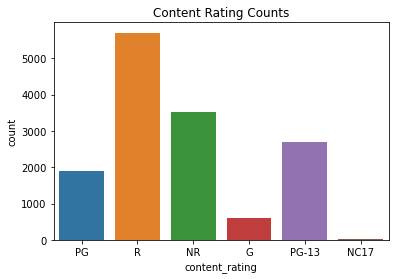

In [51]:
print(df['content_rating'].value_counts())
sns.countplot(data = df ,x = 'content_rating')
plt.title('Content Rating Counts')

Rotten             6628
Fresh              5012
Certified-Fresh    2797
Name: tomatometer_status, dtype: int64


Text(0.5, 1.0, 'Number of Fresh, Certified Fresh and Rotten Movies')

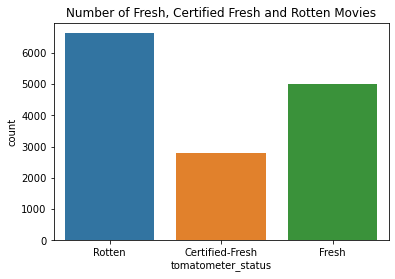

In [53]:
print(df['tomatometer_status'].value_counts())
sns.countplot(data=df, x='tomatometer_status')
plt.title('Number of Fresh, Certified Fresh and Rotten Movies')

In [54]:
df['tomatometer_status'].replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2],inplace = True)

In [55]:
df['tomatometer_status'].value_counts()

0    6628
1    5012
2    2797
Name: tomatometer_status, dtype: int64

Upright    7679
Spilled    6758
Name: audience_status, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

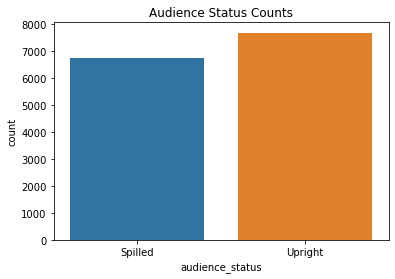

In [57]:
print(df['audience_status'].value_counts())
sns.countplot(data = df , x = 'audience_status')
plt.title('Audience Status Counts')

Warner Bros. Pictures               484
Paramount Pictures                  483
Universal Pictures                  462
20th Century Fox                    404
IFC Films                           357
Sony Pictures Home Entertainment    351
Warner Home Video                   341
MGM                                 264
MGM Home Entertainment              242
Sony Pictures Classics              231
Name: production_company, dtype: int64


Text(0.5, 1.0, 'Audience Status Counts')

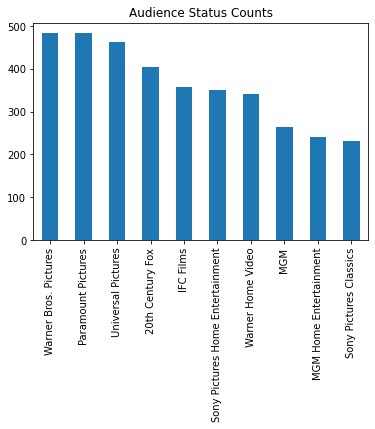

In [58]:
print(df['production_company'].value_counts()[:10])
df['production_company'].value_counts()[:10].plot(kind='bar')
plt.title('Audience Status Counts')

Check for Date time type

the actual year appears in the micro/nanosecond part of the timestamp, so we need to correctly extract it.

Extract Year from Incorrect Parsing

In [81]:
df['original_release_date'] = pd.to_datetime(df['original_release_date'], unit='s')
df['original_release_year'] = df['original_release_date'].astype(str).str[-4:].astype(int)
df['original_release_date']
print(df['original_release_year'].dtype)
print(df['original_release_year'].head())


int32
0    2010
1    2010
2    1979
3    1957
4    1954
Name: original_release_year, dtype: int32


Year with most number of movies:  2014
Year with least number of movies:  1916


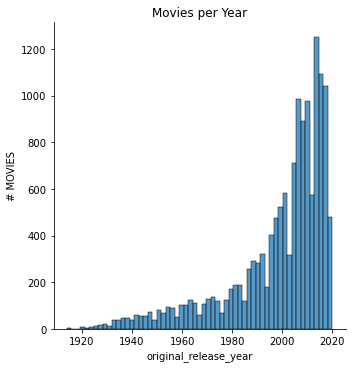

In [82]:
sns.displot(data=df, x='original_release_year')
plt.ylabel('# MOVIES')
plt.title('Movies per Year')
print('Year with most number of movies: ', df['original_release_year'].value_counts().idxmax())
print('Year with least number of movies: ', df['original_release_year'].value_counts().idxmin())

Text(0, 0.5, 'Counts')

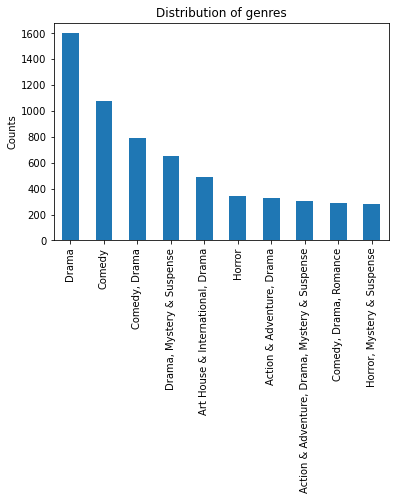

In [83]:
df['genres'].value_counts()[:10].plot(kind = 'bar')
plt.title('Distribution of genres')
plt.ylabel('Counts')

# Correlation


<AxesSubplot:>

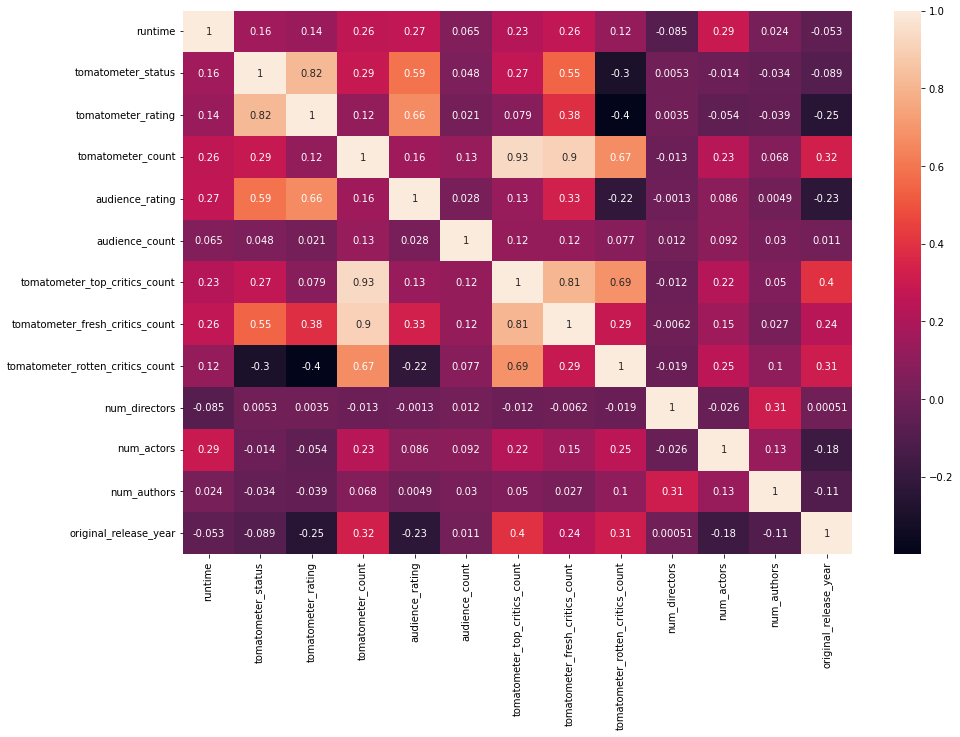

In [84]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)

In [85]:
df.select_dtypes('number').corr()['tomatometer_status'].sort_values(ascending=False)

tomatometer_status                  1.000000
tomatometer_rating                  0.816708
audience_rating                     0.587780
tomatometer_fresh_critics_count     0.545763
tomatometer_count                   0.287299
tomatometer_top_critics_count       0.265643
runtime                             0.162807
audience_count                      0.048062
num_directors                       0.005319
num_actors                         -0.014387
num_authors                        -0.033931
original_release_year              -0.089029
tomatometer_rotten_critics_count   -0.298060
Name: tomatometer_status, dtype: float64

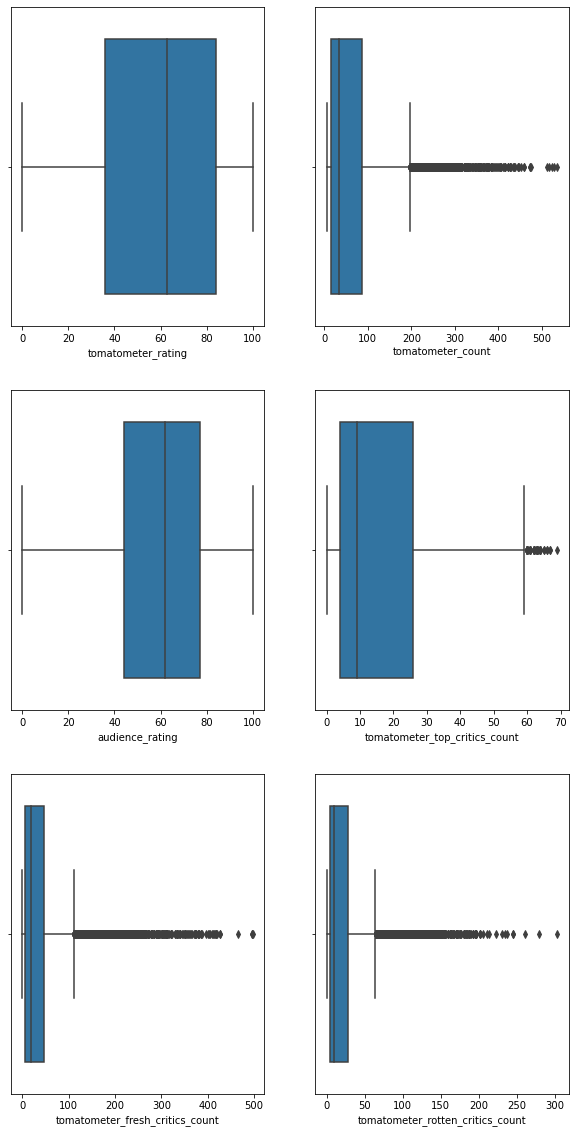

In [86]:
plt_col = ['tomatometer_rating', 'tomatometer_count', 'audience_rating', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
fig, ax = plt.subplots(3, 2, figsize=(10, 20))
ax = ax.flatten()
for index ,value in enumerate(plt_col):
    sns.boxplot(data = df, x = value, ax = ax[index])

In [89]:
masks = {col: df[col] < iqr(df[col]) * 1.5 + np.percentile(df[col], 75) for col in plt_col}

In [91]:
final_mask = reduce(lambda x, y: x & y, masks.values())

In [92]:
df =df[final_mask]

In [94]:
df.shape

(11775, 25)

In [95]:
target = df['tomatometer_status'].copy()
df.drop('tomatometer_status', axis=1, inplace=True)

In [96]:
hist_col = df.select_dtypes('number').columns
hist_col.shape

(12,)

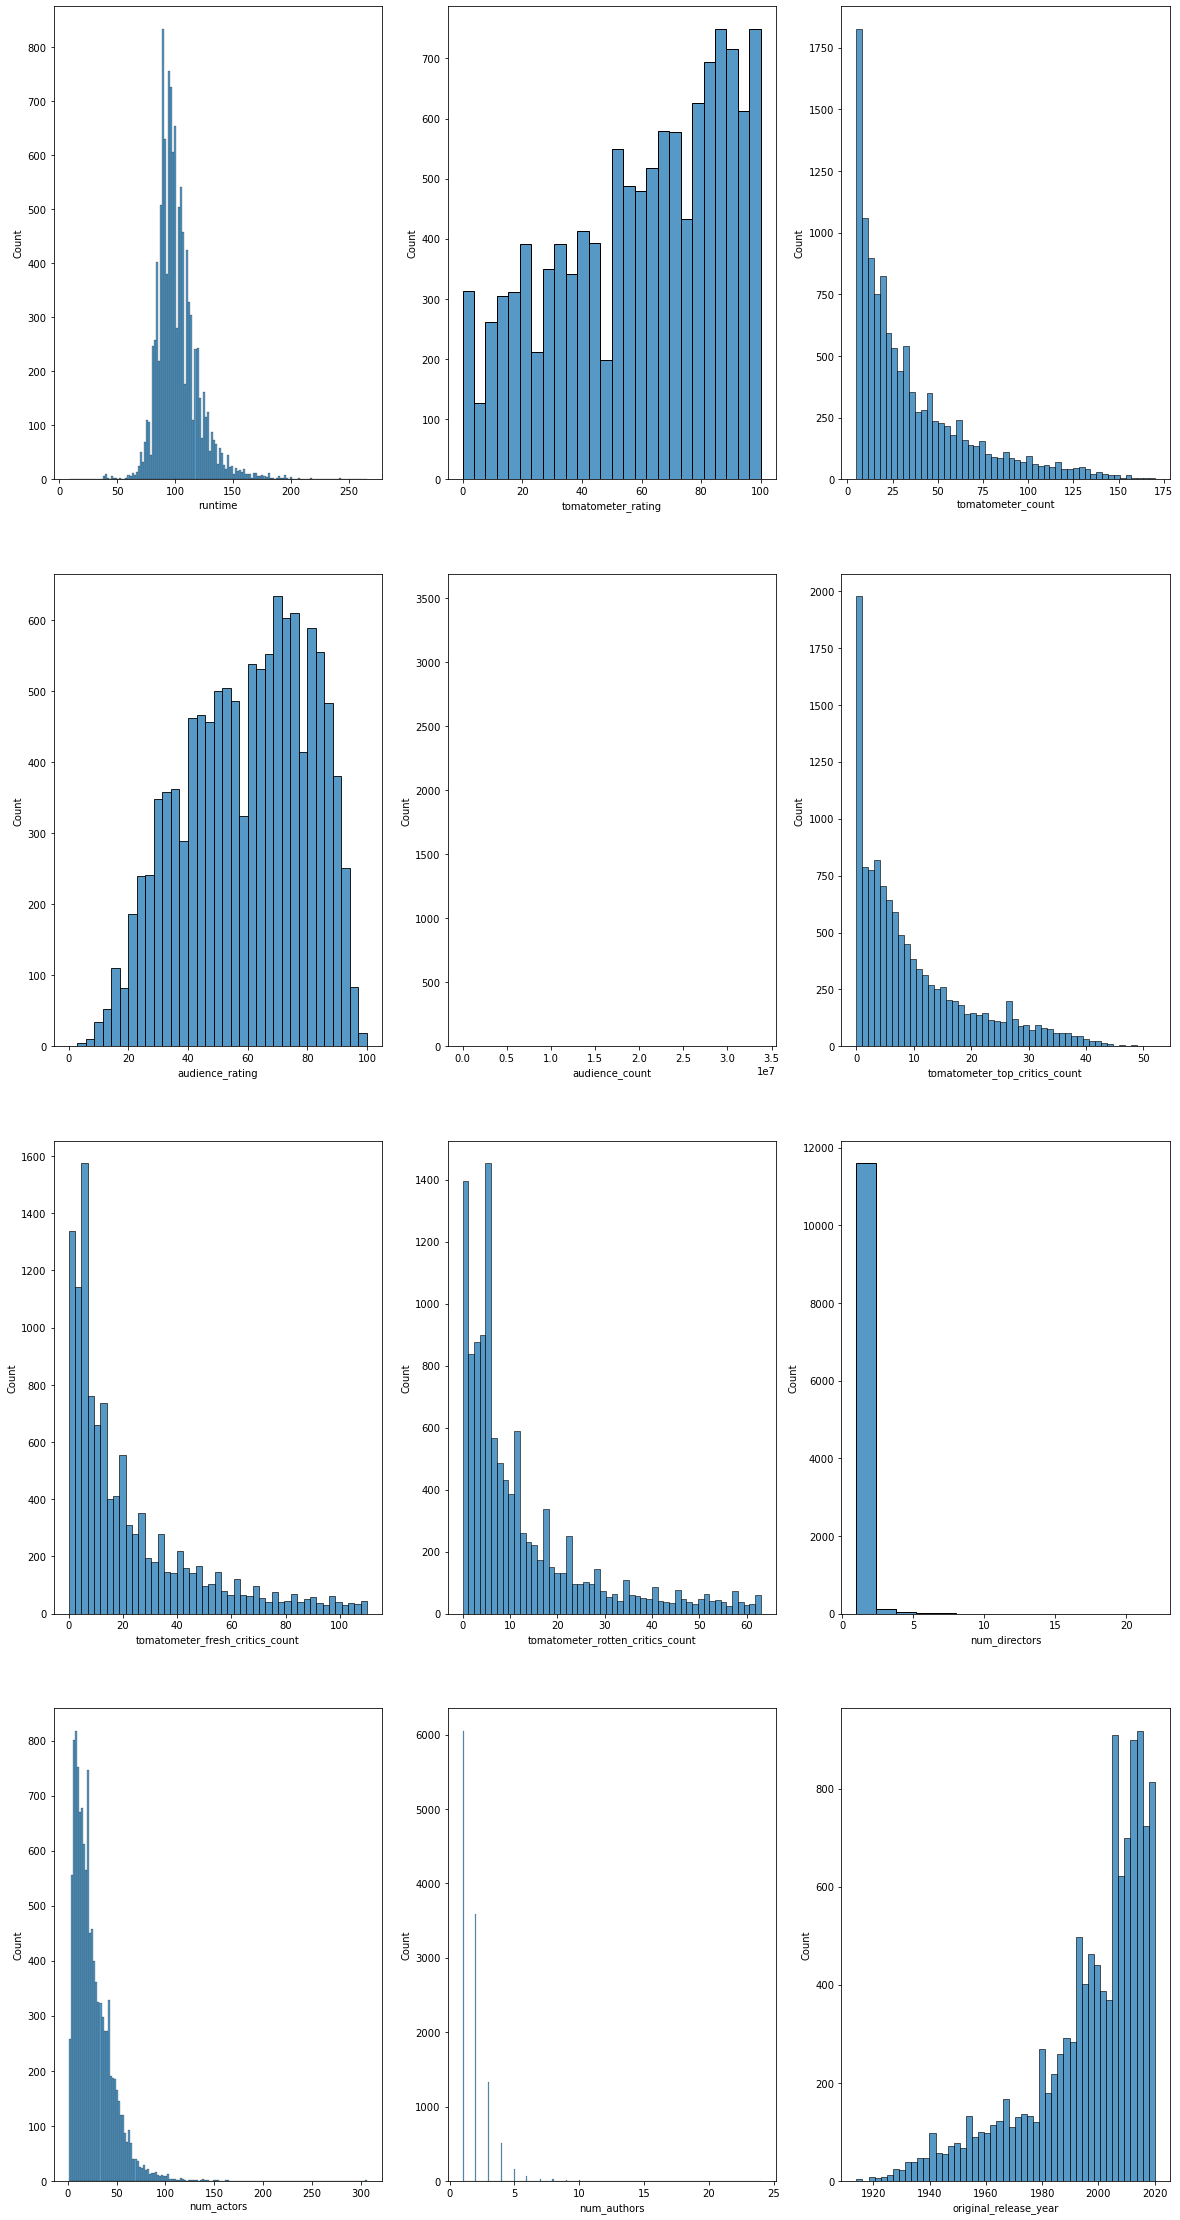

In [97]:
fig, ax = plt.subplots(4, 3, figsize=(20, 40))
ax = ax.flatten()
for index, value in enumerate(hist_col):
    sns.histplot(data=df, x=value, ax=ax[index])

In [98]:
df.skew(numeric_only=True)

runtime                              1.595251
tomatometer_rating                  -0.416737
tomatometer_count                    1.483559
audience_rating                     -0.279698
audience_count                      33.776311
tomatometer_top_critics_count        1.296750
tomatometer_fresh_critics_count      1.571695
tomatometer_rotten_critics_count     1.725348
num_directors                       12.464975
num_actors                           1.804835
num_authors                          3.324130
original_release_year               -1.243660
dtype: float64

In [99]:
skewness_ckeck = (df.skew(numeric_only=True) >= 1) | (df.skew(numeric_only=True) <= -1)
skewed_columns = skewness_ckeck[skewness_ckeck == True].index
skewed_columns

Index(['runtime', 'tomatometer_count', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'num_directors', 'num_actors',
       'num_authors', 'original_release_year'],
      dtype='object')

In [100]:
np.seterr(divide='ignore')

# Apply log transformation on positive values, while keeping zeroes.
sk_ = df[skewed_columns].apply(lambda x: np.where(x > 0, np.log(x), 0))

# Drop skewed columns
df_skew = df.drop(columns=skewed_columns)

#Merging
df_movies_skew = pd.concat([df_skew, sk_], axis=1)

# original column order
df_movies_skew = df_movies_skew[df.columns]

df_movies_skew

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_actors,num_authors,original_release_year
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1970-01-01 00:00:00.000001979,2014-07-24,...,Spilled,53.0,9.594514,0.693147,2.772589,2.079442,0.000000,3.828641,0.000000,7.590347
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1970-01-01 00:00:00.000001957,2017-01-13,...,Upright,97.0,11.565385,1.791759,3.988984,0.000000,0.000000,2.772589,0.000000,7.579168
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1970-01-01 00:00:00.000001954,2016-06-10,...,Upright,74.0,11.140673,1.609438,3.178054,1.098612,0.000000,2.772589,0.000000,7.577634
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1970-01-01 00:00:00.000001935,2017-01-12,...,Upright,86.0,10.081215,2.079442,3.891820,0.693147,0.000000,2.639057,1.386294,7.567863
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1970-01-01 00:00:00.000001957,2012-04-16,...,Upright,79.0,9.131622,1.791759,3.295837,0.000000,0.000000,2.639057,0.000000,7.579168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17702,m/zoo_2018,Zoo,A 12-year old boy and his misfit friends enlis...,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Amy Huberman, ...",1970-01-01 00:00:00.000002018,2018-06-10,...,Upright,62.0,4.852030,1.098612,2.708050,0.693147,0.000000,1.386294,0.000000,7.609862
17704,m/zoolander,Zoolander,Propelled to the top of the fashion world by a...,PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",1970-01-01 00:00:00.000002001,2013-08-01,...,Upright,80.0,13.758729,3.496508,4.477337,3.912023,0.000000,4.634729,1.098612,7.601402
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1970-01-01 00:00:00.000001981,2016-04-19,...,Upright,74.0,7.085901,0.693147,1.609438,1.386294,0.000000,3.912023,0.000000,7.591357
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1970-01-01 00:00:00.000001964,2017-01-08,...,Upright,91.0,10.315365,1.791759,3.091042,0.000000,0.693147,3.496508,0.693147,7.582738


In [101]:
content_rating = pd.get_dummies(df_movies_skew['content_rating']).astype(int)
content_rating

,G,NC17,NR,PG,PG-13,R
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0
...,...,...,...,...,...,...
17702,0,0,0,1,0,0
17704,0,0,0,0,1,0
17707,0,0,0,0,0,1
17710,0,0,0,1,0,0


In [102]:
df_movies_skew['audience_status'].replace(['Spilled', 'Upright'], [0, 1], inplace=True)

In [103]:
df_movies_skew.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'num_directors', 'num_actors', 'num_authors', 'original_release_year'],
      dtype='object')

In [104]:
df_feature = pd.concat([df_movies_skew[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_status', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'num_directors', 'num_authors', 'num_actors']], content_rating], axis=1)

In [105]:
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,num_directors,num_authors,num_actors,G,NC17,NR,PG,PG-13,R
2,4.804021,67.0,3.178054,0,53.0,9.594514,0.693147,2.772589,2.079442,0.0,0.000000,3.828641,0,0,0,0,0,1
3,4.553877,100.0,3.988984,1,97.0,11.565385,1.791759,3.988984,0.000000,0.0,0.000000,2.772589,0,0,1,0,0,0
4,4.844187,89.0,3.295837,1,74.0,11.140673,1.609438,3.178054,1.098612,0.0,0.000000,2.772589,1,0,0,0,0,0
6,4.382027,96.0,3.931826,1,86.0,10.081215,2.079442,3.891820,0.693147,0.0,1.386294,2.639057,0,0,1,0,0,0
7,4.521789,96.0,3.332205,1,79.0,9.131622,1.791759,3.295837,0.000000,0.0,0.000000,2.639057,0,0,1,0,0,0


In [106]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature)
df_feature_scale

array([[ 1.13660688,  0.25969191, -0.00366466, ..., -0.39396009,
        -0.3943915 ,  1.26215735],
       [-0.33061892,  1.43583775,  0.90048811, ..., -0.39396009,
        -0.3943915 , -0.79229424],
       [ 1.37220165,  1.04378913,  0.12765843, ..., -0.39396009,
        -0.3943915 , -0.79229424],
       ...,
       [ 0.2002929 , -0.1323567 , -1.09724764, ..., -0.39396009,
        -0.3943915 ,  1.26215735],
       [ 1.73051279,  1.29327461, -0.05111682, ...,  2.53832819,
        -0.3943915 , -0.79229424],
       [ 1.08833072, -0.3462014 , -1.22857072, ...,  2.53832819,
        -0.3943915 , -0.79229424]])

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)

In [108]:
print(f'Size of train data: {X_train.shape[0]}\nSize of test data: {X_test.shape[0]}')

Size of train data: 9420
Size of test data: 2355


In [109]:
tree = DecisionTreeClassifier(random_state=2)

In [110]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

[Text(0.2800245098039216, 0.9736842105263158, 'x[1] <= -0.008\ngini = 0.615\nsamples = 9420\nvalue = [4195, 3825, 1400]'),
 Text(0.26433823529411765, 0.9210526315789473, 'gini = 0.0\nsamples = 4195\nvalue = [4195, 0, 0]'),
 Text(0.2957107843137255, 0.9210526315789473, 'x[2] <= 0.552\ngini = 0.392\nsamples = 5225\nvalue = [0, 3825, 1400]'),
 Text(0.06274509803921569, 0.868421052631579, 'x[6] <= 0.956\ngini = 0.001\nsamples = 3251\nvalue = [0, 3249, 2]'),
 Text(0.03137254901960784, 0.8157894736842105, 'x[6] <= 0.577\ngini = 0.001\nsamples = 3227\nvalue = [0, 3226, 1]'),
 Text(0.01568627450980392, 0.7631578947368421, 'gini = 0.0\nsamples = 2973\nvalue = [0, 2973, 0]'),
 Text(0.047058823529411764, 0.7631578947368421, 'x[5] <= -0.189\ngini = 0.008\nsamples = 254\nvalue = [0, 253, 1]'),
 Text(0.03137254901960784, 0.7105263157894737, 'gini = 0.0\nsamples = 190\nvalue = [0, 190, 0]'),
 Text(0.06274509803921569, 0.7105263157894737, 'x[5] <= -0.188\ngini = 0.031\nsamples = 64\nvalue = [0, 63, 1]

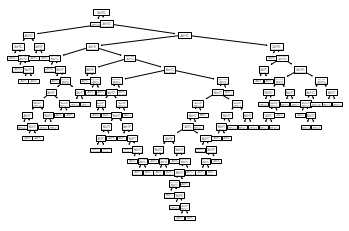

In [111]:
plot_tree(tree)

In [112]:
y_predict = tree.predict(X_test)

In [113]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9893842887473461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.97      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.98      2355
weighted avg       0.99      0.99      0.99      2355



[[1027    0    0]
 [   0  950   10]
 [   0   15  353]]


Text(33.0, 0.5, 'ACTUAL')

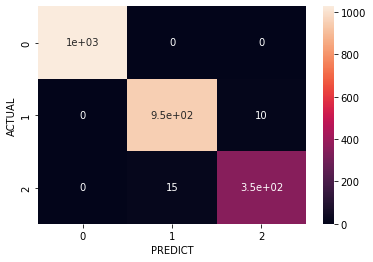

In [114]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

Random forest

In [115]:
random_forest = RandomForestClassifier(random_state=2)

In [119]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [120]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9915074309978769
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      1.00      0.99       960
           2       0.99      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.99      2355
weighted avg       0.99      0.99      0.99      2355



[[1027    0    0]
 [   0  956    4]
 [   0   16  352]]


Text(33.0, 0.5, 'ACTUAL')

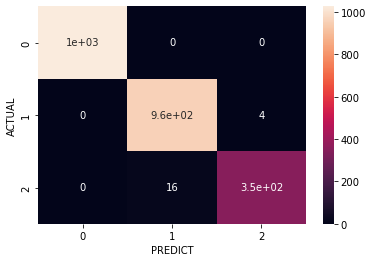

In [121]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

fruntime: 0.004397083296385907
ftomatometer_rating: 0.522064962068805
ftomatometer_count: 0.09693235316368588
faudience_status: 0.02707797816073271
faudience_rating: 0.04350468565600802
faudience_count: 0.010889519154471717
ftomatometer_top_critics_count: 0.027229304062177596
ftomatometer_fresh_critics_count: 0.1330198409391083
ftomatometer_rotten_critics_count: 0.1160274015503831
fnum_directors: 0.0006325369978027552
fnum_authors: 0.0014807276827121124
fnum_actors: 0.004527988318280005
fG: 0.00026691397614902297
fNC17: 2.1950577772793267e-05
fNR: 0.00798304330163969
fPG: 0.0004690805392571374
fPG-13: 0.0013487979856973468
fR: 0.0021258325689310245


([<matplotlib.axis.YTick at 0x20ed30ab4c0>,
 [Text(0, 0, 'runtime'),
  Text(0, 1, 'tomatometer_rating'),
  Text(0, 2, 'tomatometer_count'),
  Text(0, 3, 'audience_status'),
  Text(0, 4, 'audience_rating'),
  Text(0, 5, 'audience_count'),
  Text(0, 6, 'tomatometer_top_critics_count'),
  Text(0, 7, 'tomatometer_fresh_critics_count'),
  Text(0, 8, 'tomatometer_rotten_critics_count'),
  Text(0, 9, 'num_directors'),
  Text(0, 10, 'num_authors'),
  Text(0, 11, 'num_actors'),
  Text(0, 12, 'G'),
  Text(0, 13, 'NC17'),
  Text(0, 14, 'NR'),
  Text(0, 15, 'PG'),
  Text(0, 16, 'PG-13'),
  Text(0, 17, 'R')])

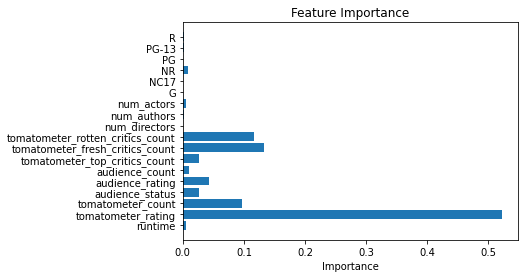

In [122]:
feature_importances = random_forest.feature_importances_
for index, feature in enumerate(df_feature.columns):
    print(f'f{feature}: {feature_importances[index]}')

plt.barh(np.arange(len(feature_importances)), feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.yticks(np.arange(len(feature_importances)), df_feature.columns)

Feature Selection

In [123]:
scaler = StandardScaler()
df_feature_scale = scaler.fit_transform(df_feature.drop(['R', 'PG-13', 'PG', 'NR', 'NC17', 'G', 'num_actors', 'num_authors', 'num_directors', 'runtime'], axis=1))
df_feature_scale

array([[ 0.25969191, -0.00366466, -1.06322646, ..., -0.99834516,
         0.22228994,  0.10197493],
       [ 1.43583775,  0.90048811,  0.9405334 , ..., -0.00843641,
         1.22130938, -1.73058151],
       [ 1.04378913,  0.12765843,  0.9405334 , ..., -0.17271794,
         0.55529642, -0.76240376],
       ...,
       [-0.1323567 , -1.09724764,  0.9405334 , ..., -0.99834516,
        -0.73300005, -0.50887721],
       [ 1.29327461, -0.05111682,  0.9405334 , ..., -0.00843641,
         0.48383441, -1.73058151],
       [-0.3462014 , -1.22857072,  0.9405334 , ..., -1.62290804,
        -0.91626674, -0.50887721]])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df_feature_scale, target, test_size=0.2, random_state=42)
print(f'Size of train data: {X_train.shape[0]}\nSize of test data: {X_test.shape[0]}')

Size of train data: 9420
Size of test data: 2355


In [125]:
random_forest = RandomForestClassifier(random_state=2)

In [126]:
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)

In [127]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9898089171974522
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.98      0.95      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.98      2355
weighted avg       0.99      0.99      0.99      2355



[[1027    0    0]
 [   0  954    6]
 [   0   18  350]]


Text(33.0, 0.5, 'ACTUAL')

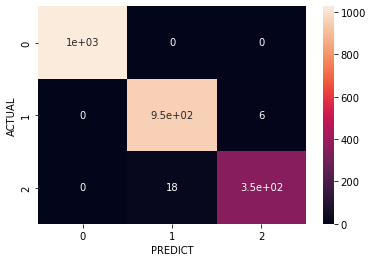

In [128]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

In [129]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target.values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7516277288395251, 1: 0.8202716823406478, 2: 2.2200226244343892}

In [130]:
random_forest_weighted = RandomForestClassifier(random_state=2)


In [131]:
random_forest_weighted.fit(X_train, y_train)
y_predict = random_forest_weighted.predict(X_test)

In [132]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9898089171974522
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      0.99      0.99       960
           2       0.98      0.95      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.98      2355
weighted avg       0.99      0.99      0.99      2355



[[1027    0    0]
 [   0  954    6]
 [   0   18  350]]


Text(33.0, 0.5, 'ACTUAL')

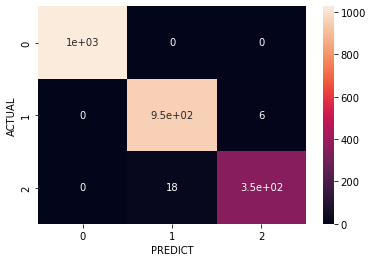

In [133]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')

XGBoost model

In [136]:
clf = XGBClassifier(max_depth=5,
                    objective='multi:softprob',
                    n_estimators=1000, 
                    )

In [137]:
clf.fit(X_train, y_train)  
y_predict = clf.predict(X_test)

In [138]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))


0.9915074309978769
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1027
           1       0.98      1.00      0.99       960
           2       0.99      0.96      0.97       368

    accuracy                           0.99      2355
   macro avg       0.99      0.98      0.99      2355
weighted avg       0.99      0.99      0.99      2355



[[1027    0    0]
 [   0  956    4]
 [   0   16  352]]


Text(33.0, 0.5, 'ACTUAL')

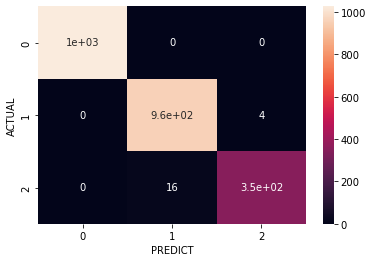

In [139]:
print(confusion_matrix(y_test, y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.xlabel('PREDICT')
plt.ylabel('ACTUAL')